# Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.7, random_state=0)

print(df_train.shape)
print(df_test.shape)

(17, 2)
(8, 2)


In [5]:
from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()

num_features = ['Hours', 'Scores']

norm_train_data = rescale.fit_transform(df_train.loc[:,num_features])

print(norm_train_data.shape, type(norm_train_data))

(17, 2) <class 'numpy.ndarray'>


In [6]:
df_train = pd.DataFrame(norm_train_data, columns = num_features)

df_train.head()

,Hours,Scores
0,0.716049,0.756410
1,0.000000,0.000000
2,0.493827,0.384615
3,0.814815,0.871795
4,0.271605,0.320513


In [7]:
X_train = np.array(df_train['Hours'])
y_train = np.array(df_train['Scores'])

In [8]:
def gradient(X, y, learning_rate=0.001, iters=1000, m_curr=0, c_curr=0):
    N = float(len(y))
    grad = pd.DataFrame( columns = ['slope', 'intercept', 'mse'] )
    for i in range(iters):
        y_pred = (m_curr * X) + c_curr
        mse = sum([error**2 for error in (y - y_pred)]) / N
        derivative_m = -(2/N) * sum(X * (y - y_pred))      # derivative wrt m
        derivative_c = -(2/N) * sum(y - y_pred)            # derivative wrt c
        m_curr = m_curr - (learning_rate * derivative_m)   # updating m
        c_curr = c_curr - (learning_rate * derivative_c)   # updating c
        grad.loc[i] = [m_curr, c_curr, mse]
    return(grad)


In [9]:
grad = gradient(X_train, y_train, 0.1)

grad.tail()

,slope,intercept,mse
995,1.016505,-0.049509,0.005206
996,1.016505,-0.049509,0.005206
997,1.016505,-0.049509,0.005206
998,1.016505,-0.049510,0.005206
999,1.016505,-0.049510,0.005206


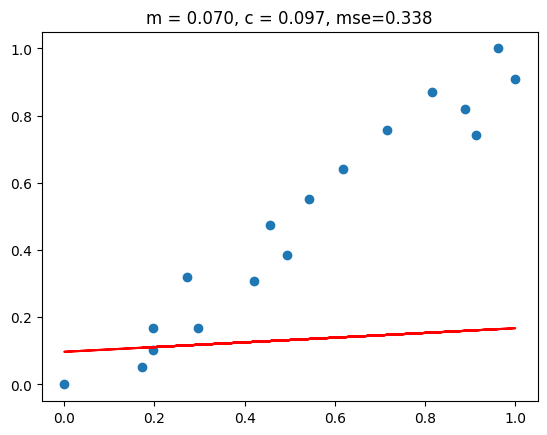

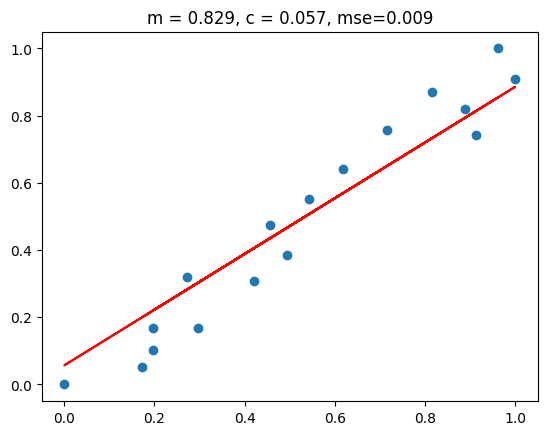

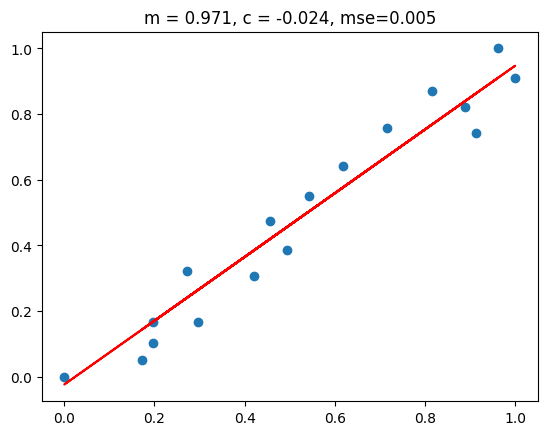

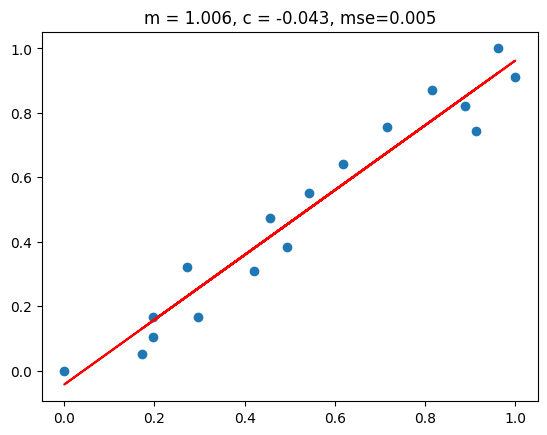

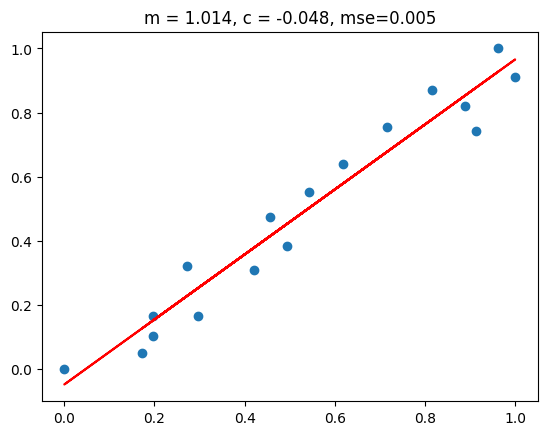

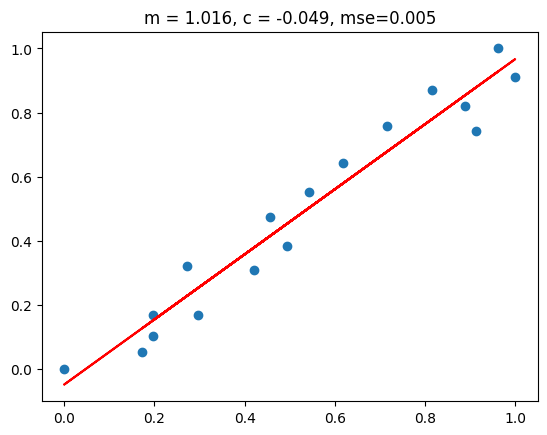

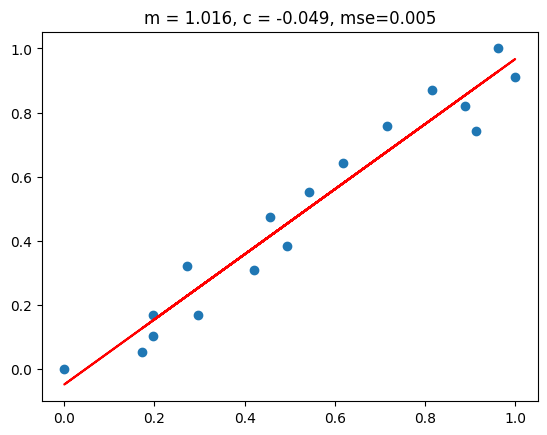

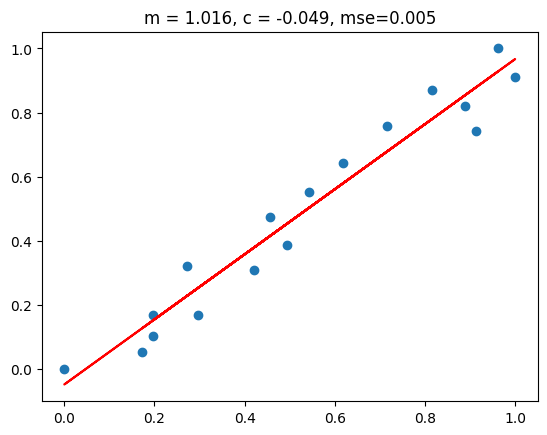

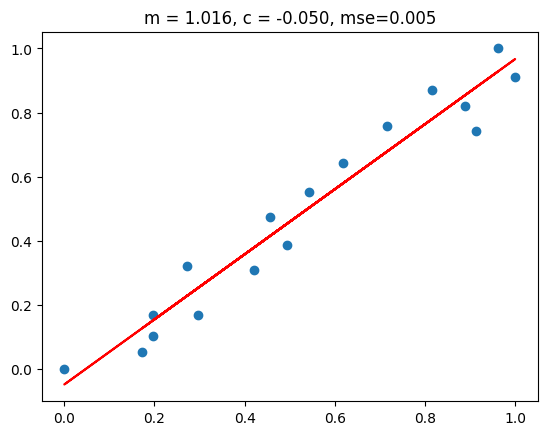

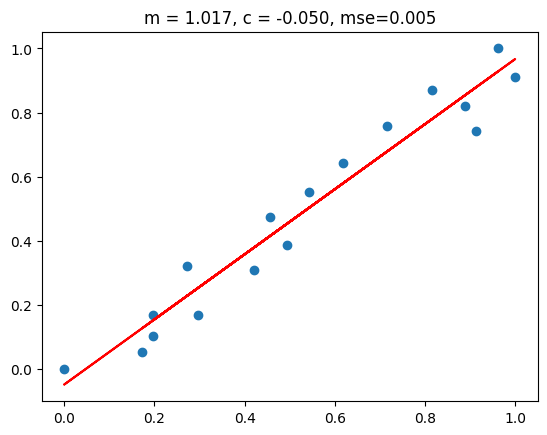

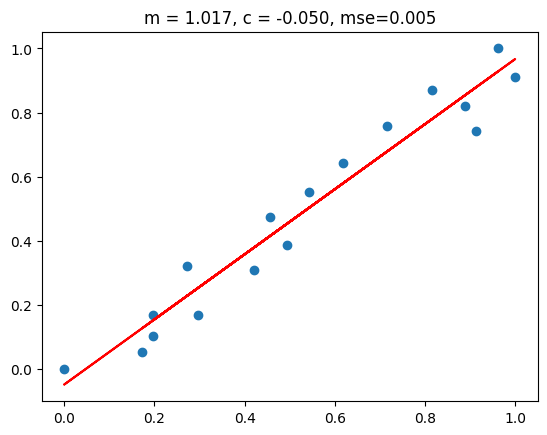

In [10]:
import time

for i in range(0, grad.shape[0], 99):
    plt.scatter(X_train, y_train)
    plt.plot(X_train, grad.iloc[i, 1] + grad.iloc[i, 0] * X_train, 'r')
    plt.title("m = %.3f, c = %.3f, mse=%.3f"%(grad.iloc[i, 0], grad.iloc[i, 1], grad.iloc[i, 2]))
    plt.show()
    time.sleep(1)

In [11]:
grad.tail()

,slope,intercept,mse
995,1.016505,-0.049509,0.005206
996,1.016505,-0.049509,0.005206
997,1.016505,-0.049509,0.005206
998,1.016505,-0.049510,0.005206
999,1.016505,-0.049510,0.005206
